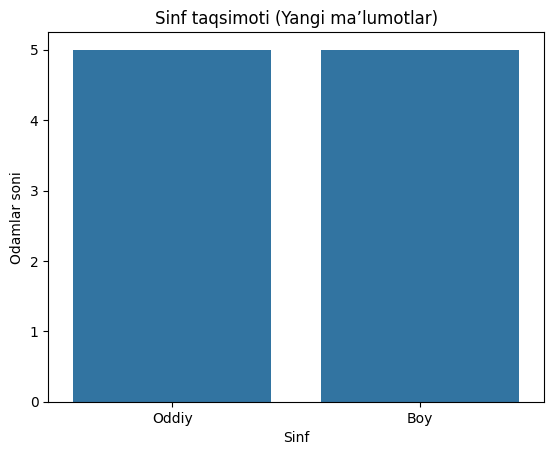

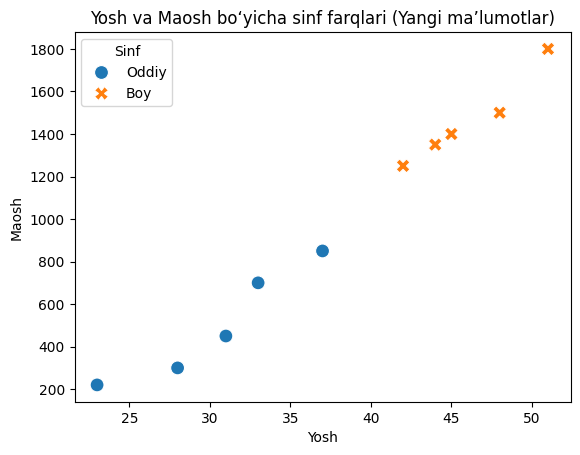

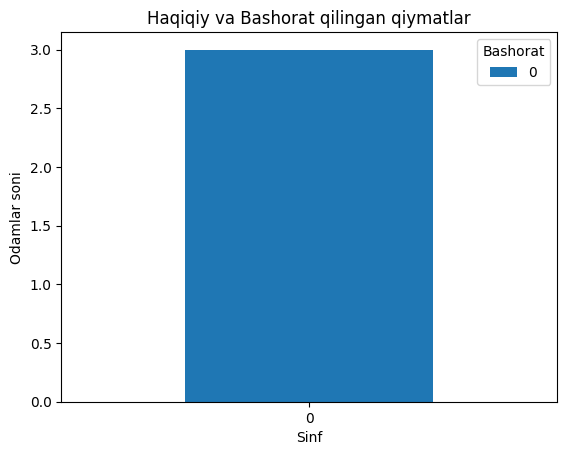

Aniqlik (Accuracy): 1.0
Aniqlik (Precision): 0.0
Qayta chaqirish (Recall): 0.0
F1 o'lchovi (F1-score): 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Yangi sun’iy ma’lumotlar
data = {
    'Yosh': [23, 37, 45, 51, 44, 28, 33, 42, 31, 48],
    'Staj': [2, 11, 19, 24, 17, 3, 8, 14, 5, 20],
    'Maosh': [220, 850, 1400, 1800, 1350, 300, 700, 1250, 450, 1500],
    'Sinf': ['Oddiy', 'Oddiy', 'Boy', 'Boy', 'Boy', 'Oddiy', 'Oddiy', 'Boy', 'Oddiy', 'Boy']
}

df = pd.DataFrame(data)

# 2. Grafik 1: Sinf taqsimoti
sns.countplot(data=df, x='Sinf')
plt.title("Sinf taqsimoti (Yangi ma’lumotlar)")
plt.xlabel("Sinf")
plt.ylabel("Odamlar soni")
plt.show()

# 3. Grafik 2: Yosh va Maosh bo‘yicha sinf farqlari
sns.scatterplot(data=df, x='Yosh', y='Maosh', hue='Sinf', style='Sinf', s=100)
plt.title("Yosh va Maosh bo‘yicha sinf farqlari (Yangi ma’lumotlar)")
plt.show()

# 4. Modelga tayyorlash
X = df[['Yosh', 'Staj', 'Maosh']]
y = df['Sinf'].map({'Oddiy': 0, 'Boy': 1})

# 5. Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Model qurish va o‘qitish
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Bashorat va tahlil
y_pred = model.predict(X_test)

# 8. Grafik 3: Haqiqiy va Bashorat qilingan qiymatlar
comparison_df = pd.DataFrame({'Haqiqiy': y_test.values, 'Bashorat': y_pred})
comparison_df.value_counts().unstack().plot(kind='bar', rot=0)
plt.title("Haqiqiy va Bashorat qilingan qiymatlar")
plt.xlabel("Sinf")
plt.ylabel("Odamlar soni")
plt.show()

# 9. Baholash metrikalari
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("Aniqlik (Precision):", precision_score(y_test, y_pred))
print("Qayta chaqirish (Recall):", recall_score(y_test, y_pred))
print("F1 o'lchovi (F1-score):", f1_score(y_test, y_pred))
